In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
cm = pd.read_csv('data/Churn_Modelling.csv')

cm.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- 종속변수(Exited) 범주에 따른 수치형 변수의 분포 탐색

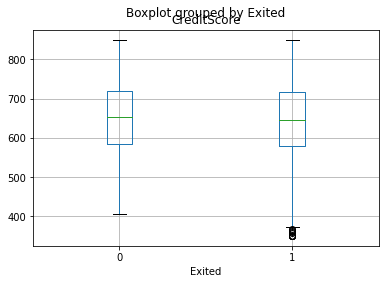

In [3]:
cm.boxplot(column=['CreditScore'], by="Exited") 

- CreditScore는 Exited 범주에 따라 큰 차이가 없어 보임

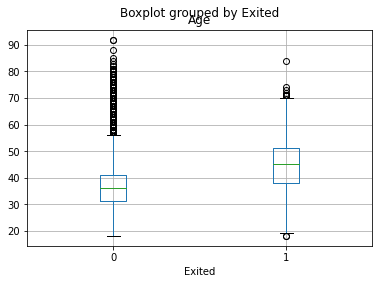

In [4]:
cm.boxplot(column=['Age'], by="Exited") 

- 이탈한 고객의 연령이 더 높아보임. 이탈하지 않은 고객 중에도 outlier에 해당하는 연령이 높은 고객이 있음

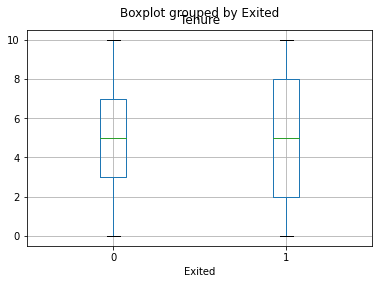

In [5]:
cm.boxplot(column=['Tenure'], by="Exited")

- Tenure는 중앙값은 비슷하지만 이탈고객의 범위가 이탈하지 않은 고객에 비해 넓음

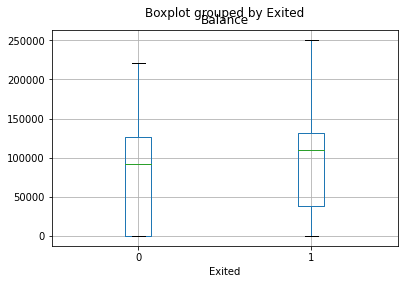

In [6]:
cm.boxplot(column=['Balance'], by="Exited")

- Balance는 이탈한 고객의 중앙값이 살짝 더 높으며, 이탈하지 않는 고객 중에서 Balance가 매주 적은 고객들이 보임

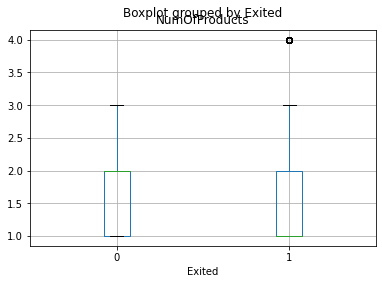

In [7]:
cm.boxplot(column=['NumOfProducts'], by="Exited")

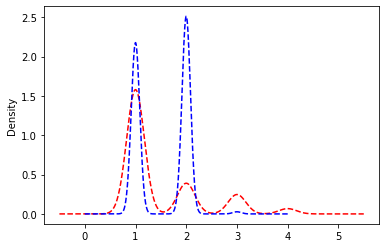

In [8]:
cm1 = cm[cm.Exited == 1]
cm0 = cm[cm.Exited == 0]

cm1['NumOfProducts'].plot(kind='kde', style='r--') 
cm0['NumOfProducts'].plot(kind='kde', style='b--') 

- 이탈하지 않는 고객은 대체로 1,2개의 제품을 활용하고 있으며, 이탈고객중에는 3,4개의 제품을 활용한 경우도 보임

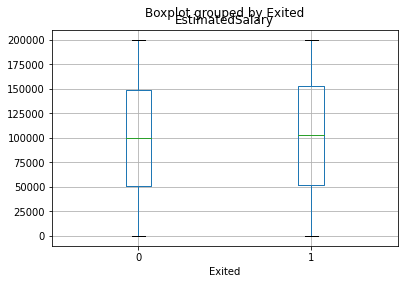

In [9]:
cm.boxplot(column=['EstimatedSalary'], by="Exited")

- EstimatedSalary는 두 집단 간 차이가 없어보임 

In [10]:
counts = pd.crosstab(cm.Exited, cm.Geography)
counts

Geography,France,Germany,Spain
Exited,,,
0,4204,1695,2064
1,810,814,413


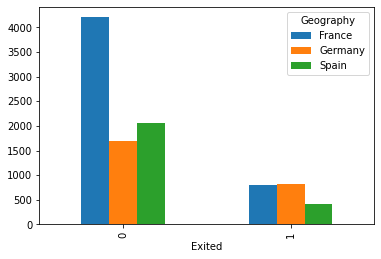

In [11]:
counts.plot(kind='bar', stacked=False)

- 이탈하지 않은 고객 중에는 France와 Spain의 비율이 Germany에 비해 높아보임. 이탈고객은 Germany의 비율이 높음

In [12]:
counts = pd.crosstab(cm.Exited, cm.Gender)
counts

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


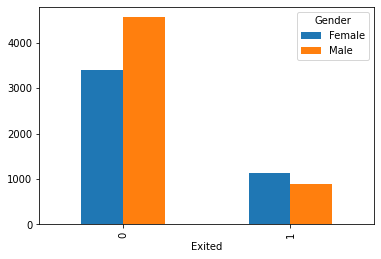

In [13]:
counts.plot(kind='bar', stacked=False)

- 이탈하지 않은 고객은 남성이 많고, 이탈고객은 여성이 많음

In [14]:
counts = pd.crosstab(cm.Exited, cm.HasCrCard)
counts

HasCrCard,0,1
Exited,,
0,2332,5631
1,613,1424


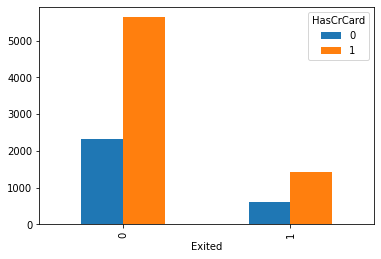

In [15]:
counts.plot(kind='bar', stacked=False)

In [16]:
counts[1][0] / (counts[0][0] + counts[1][0]) # 이탈하지 않은 고객 중 신용카드 보유비율

0.7071455481602411

In [17]:
counts[1][1] / (counts[0][1] + counts[1][1]) # 이탈 고객 중 신용카드 보유비율

0.6990672557682867

- 두 집단의 신용카드 보유 비율은 비슷해 보임

In [18]:
counts = pd.crosstab(cm.Exited, cm.IsActiveMember)
counts

IsActiveMember,0,1
Exited,,
0,3547,4416
1,1302,735


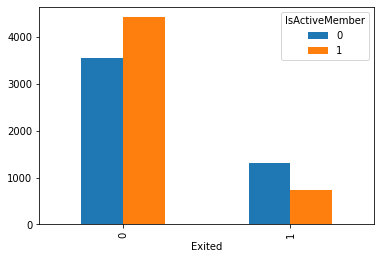

In [19]:
counts.plot(kind='bar', stacked=False)

- 이탈하지 않은 고객 중에는 ActiveMember가 많고, 이탈고객은 ActiveMember가 적음 

- CreditScore, EstimatedSalary, HasCrCard 제외

- 범주형 변수는 제외하기로 함. Geography, Gender 제외

In [20]:
X = cm.drop(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'EstimatedSalary', 'HasCrCard', 'Geography', 'Gender', 'Exited'], axis=1)
X.head()

,Age,Tenure,Balance,NumOfProducts,IsActiveMember
0,42,2,0.00,1,1
1,41,1,83807.86,1,1
2,42,8,159660.80,3,0
3,39,1,0.00,2,0
4,43,2,125510.82,1,1


In [21]:
y = cm['Exited']

In [22]:
clf_cv = LogisticRegression()

scores = cross_val_score(clf_cv, X, y, scoring='roc_auc', cv=10)
scores.mean()

0.26351257260256605

- 성과가 좋지 않음. 범주형 변수가 아닌 변수들은 다시 추가해봄

In [23]:
X_2 = cm.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender', 'Exited'], axis=1)
X_2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [24]:
clf_cv_2 = LogisticRegression()

scores = cross_val_score(clf_cv_2, X_2, y, scoring='roc_auc', cv=10)
scores.mean()

0.6699053512618349

In [25]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.483477
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.044     
Dependent Variable: Exited           AIC:              9679.5450 
Date:               2020-09-23 05:30 BIC:              9715.5967 
No. Observations:   10000            Log-Likelihood:   -4834.8   
Df Model:           4                LL-Null:          -5054.9   
Df Residuals:       9995             LLR p-value:      5.6009e-94
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Age               0.0247   0.0018  13.8083 0.0000  0.0212  0.0282
Tenure           -0.0950   0.0084 -11.3082 0.0000 -0.1115 -0.0785


In [26]:
logit_model=sm.Logit(y,X_2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.453535
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.103      
Dependent Variable: Exited           AIC:              9086.6923  
Date:               2020-09-23 05:30 BIC:              9144.3750  
No. Observations:   10000            Log-Likelihood:   -4535.3    
Df Model:           7                LL-Null:          -5054.9    
Df Residuals:       9992             LLR p-value:      4.3052e-220
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
CreditScore       -0.0039   0.0002 -21.1819 0.0000 -0.0043 -0.0036
Age                0.0567   0.0023  24.8042 0.0000  0

- 분포상으로는 집단간 차이가 보이지 않더라도 유의한 관계를 보일 수 있음. 분석가는 다양한 독립변수 집합에 대해 모형을 학습하여 성과를 비교할 필요가 있음